In [3]:
import numpy as np


def n_link_pendulum(t, y, n, lengths, masses, g=9.81):
    theta = y[:n]
    omega = y[n:]

    dydt = np.zeros(2 * n)

    M = np.zeros((n, n))
    C = np.zeros(n)

    for i in range(n):
        for j in range(n):
            M[i, j] = sum(
                masses[k] * lengths[i] * lengths[j] * np.cos(theta[i] - theta[j])
                for k in range(max(i, j), n)
            )

        C[i] = -sum(
            masses[k]
            * lengths[i]
            * lengths[k]
            * omega[k] ** 2
            * np.sin(theta[i] - theta[k])
            for k in range(i + 1, n)
        ) - sum(masses[k] * g * lengths[i] * np.sin(theta[i]) for k in range(i, n))

    # Solve M alpha = C for alpha (angular accelerations)
    alpha = np.linalg.solve(M, C)

    dydt[:n] = omega
    dydt[n:] = alpha
    return dydt

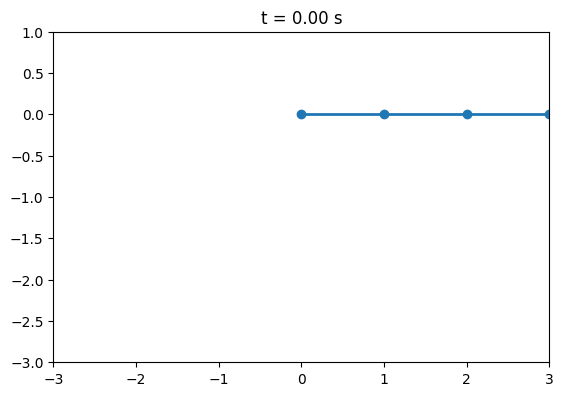

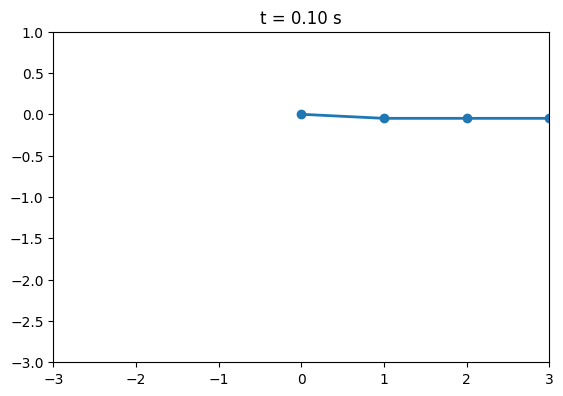

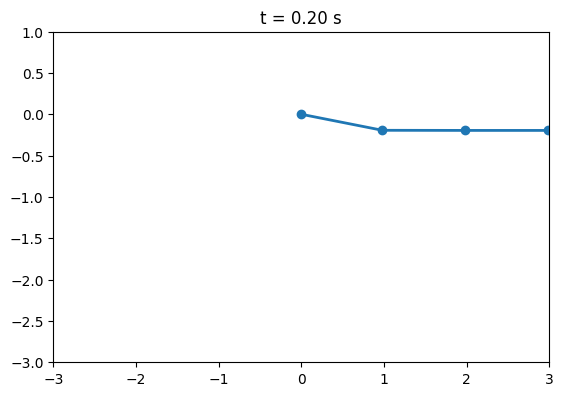

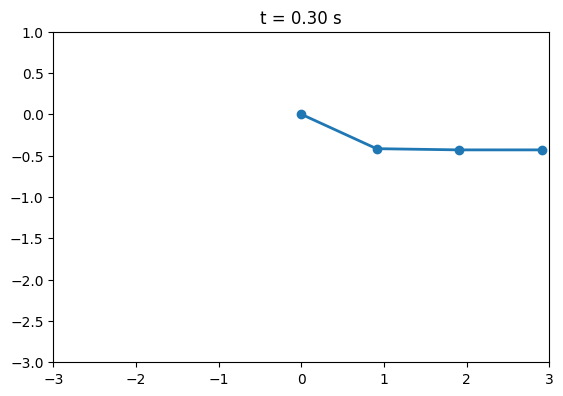

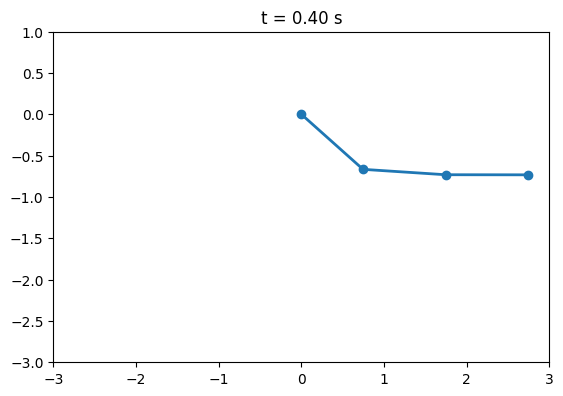

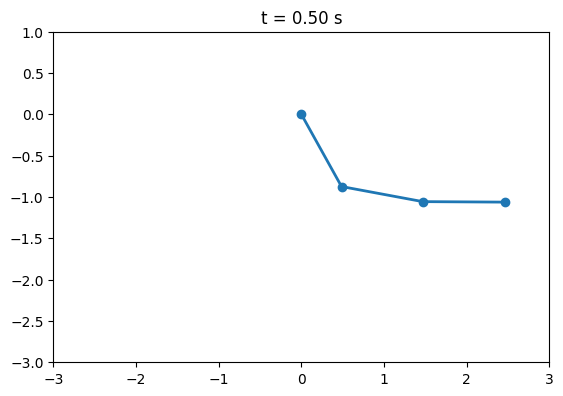

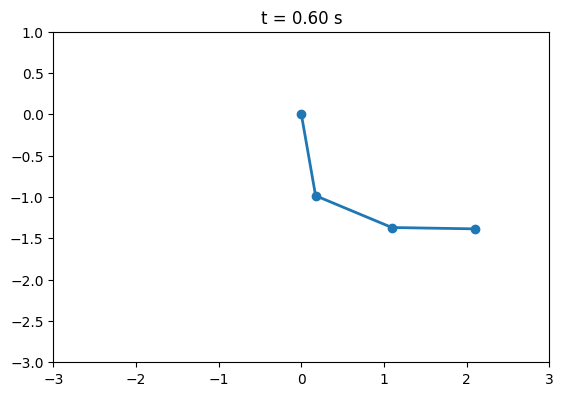

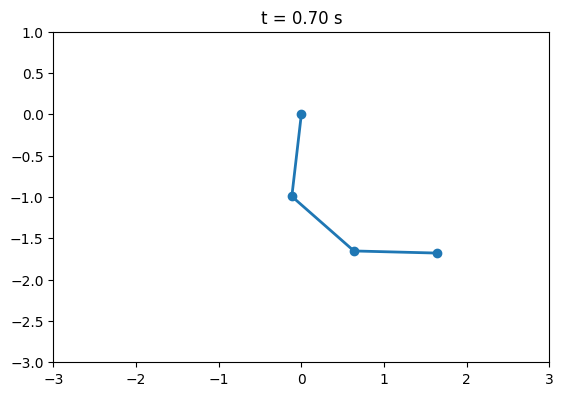

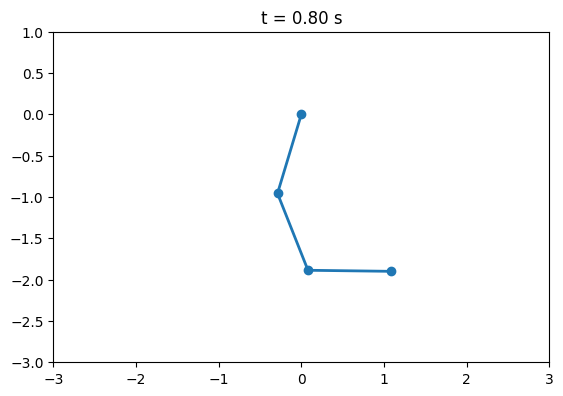

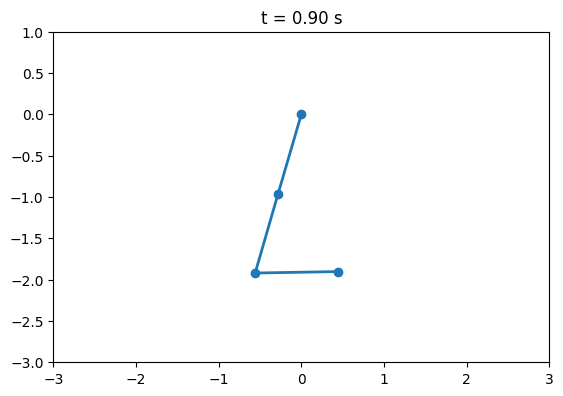

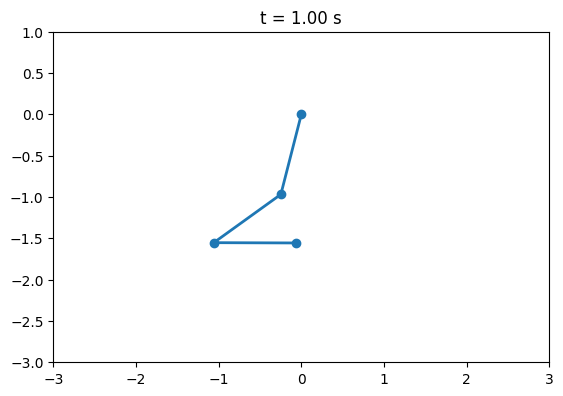

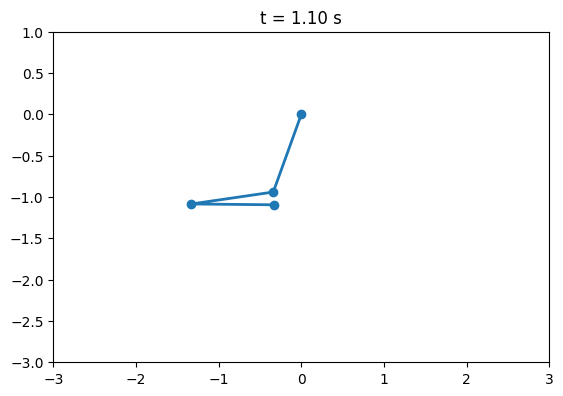

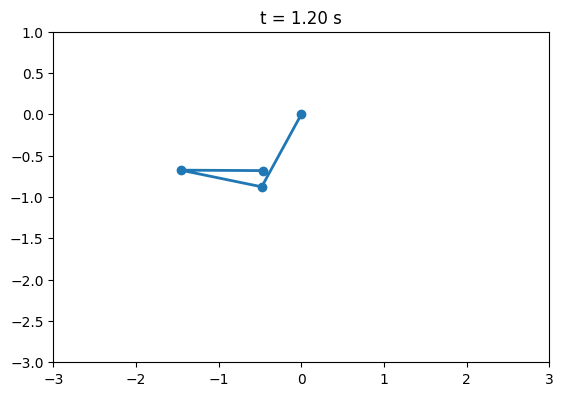

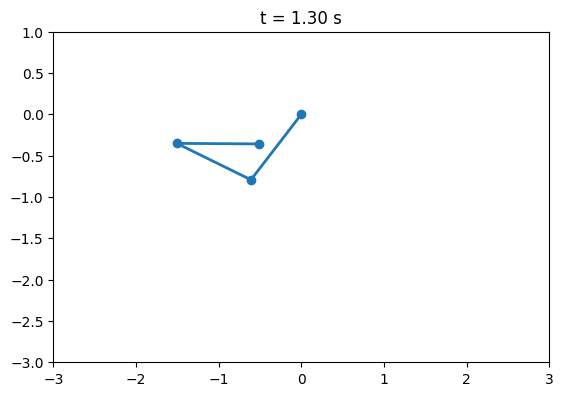

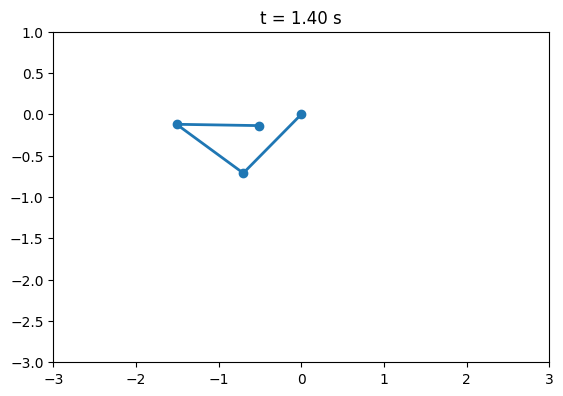

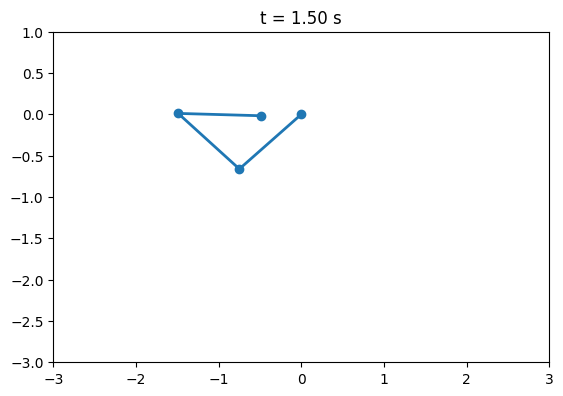

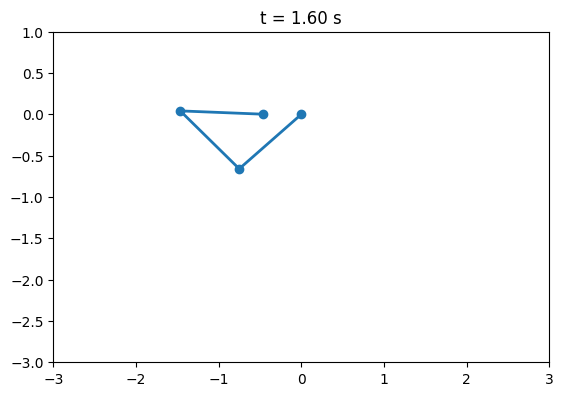

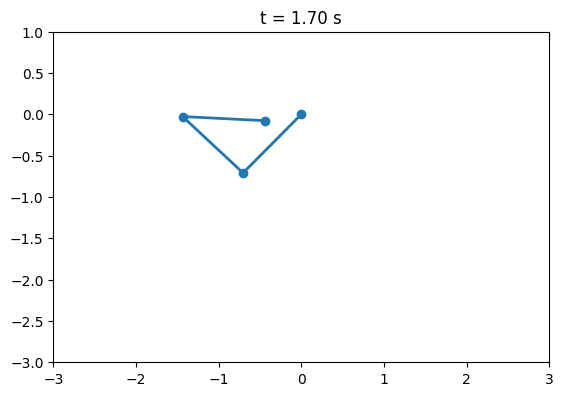

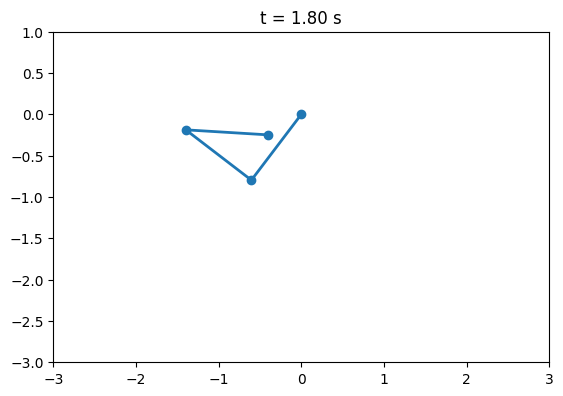

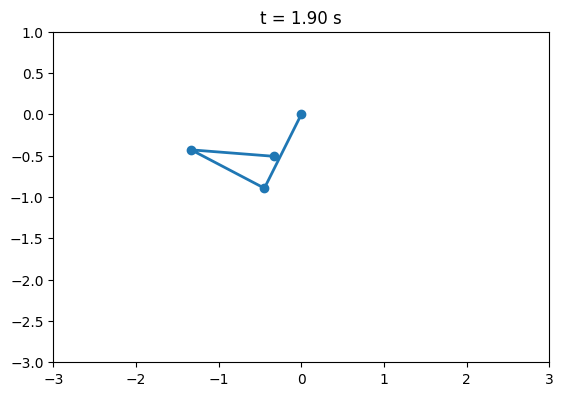

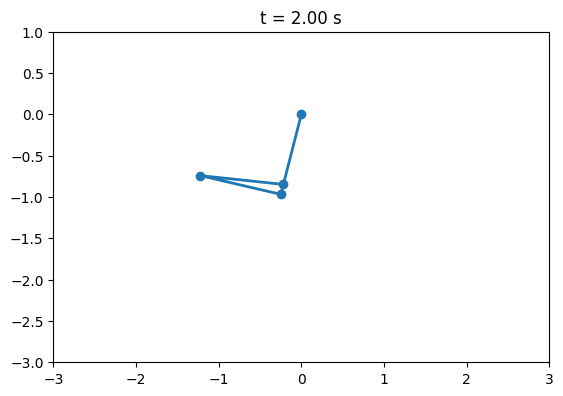

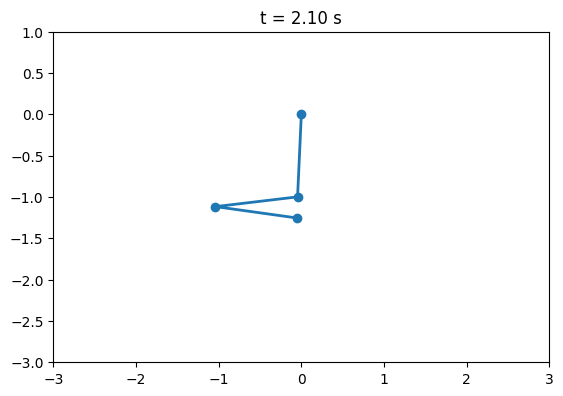

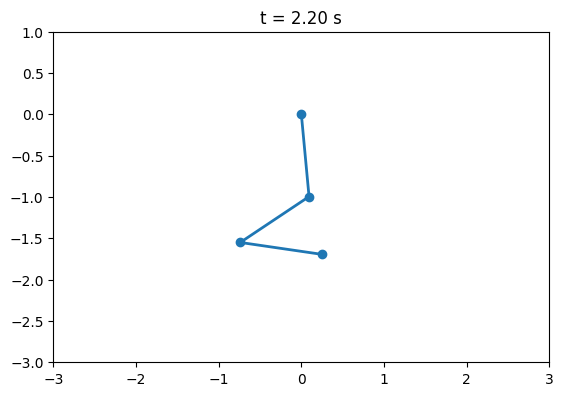

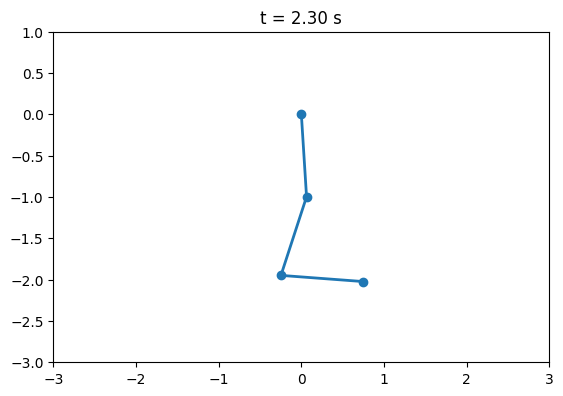

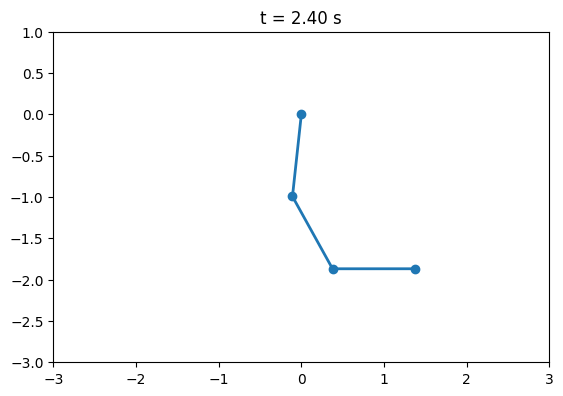

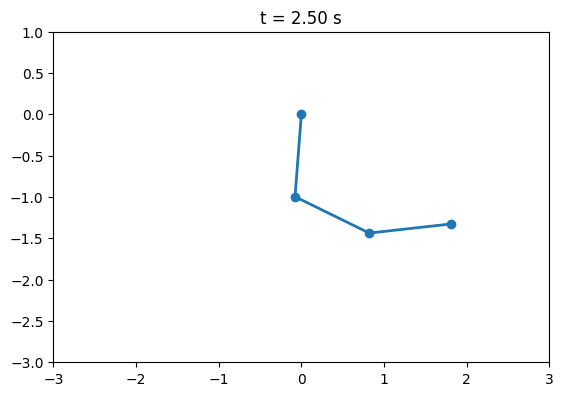

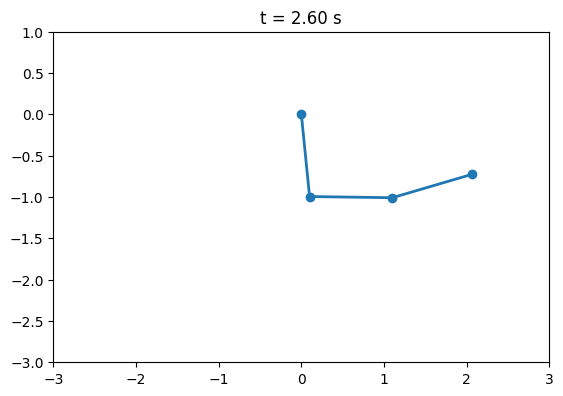

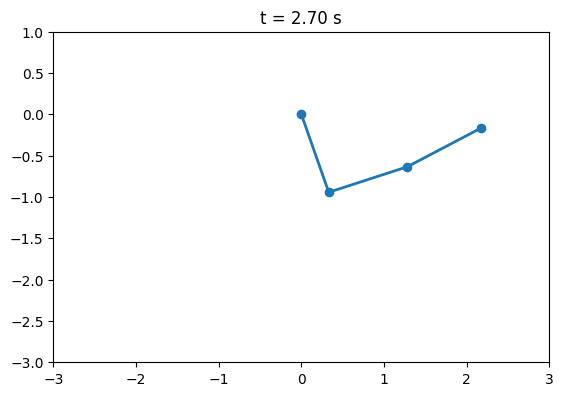

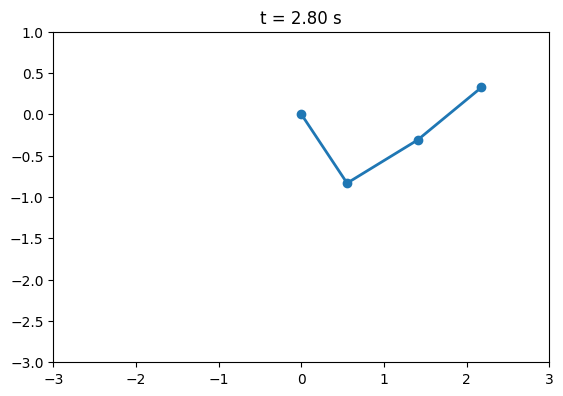

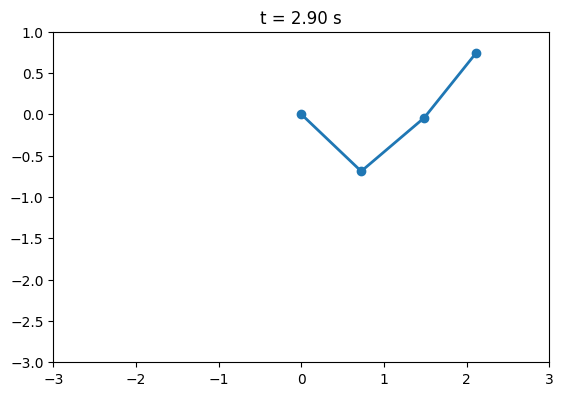

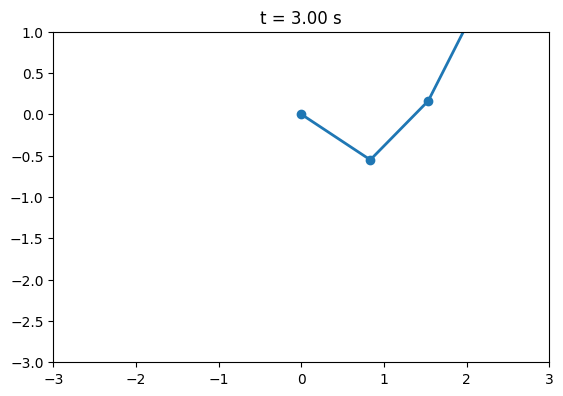

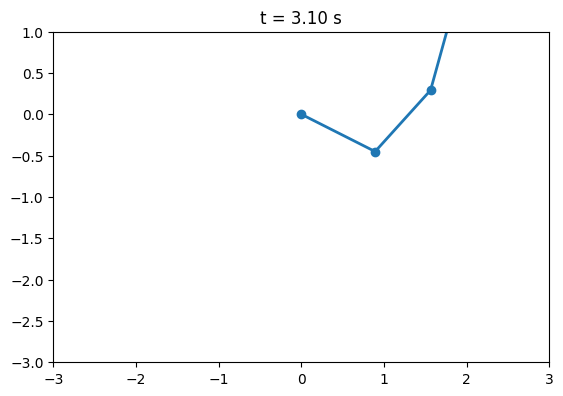

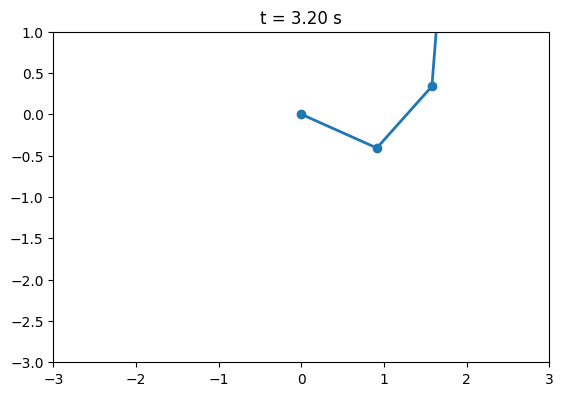

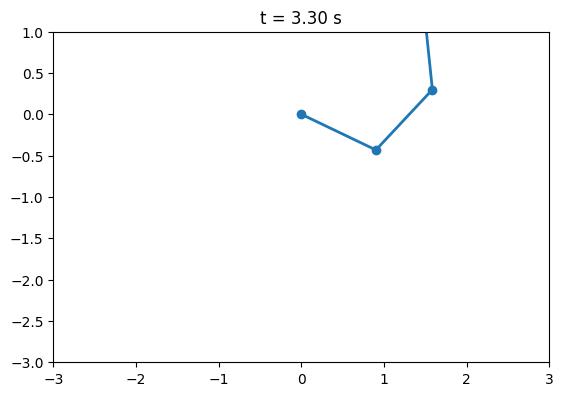

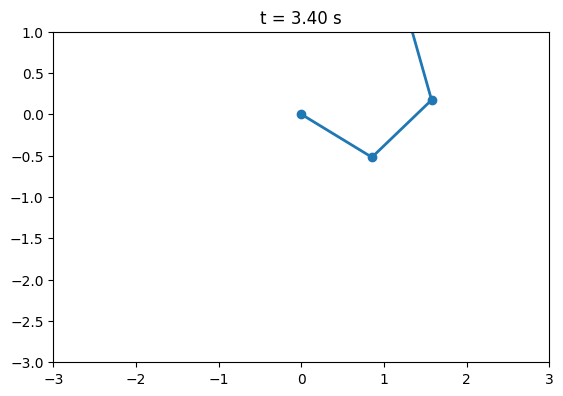

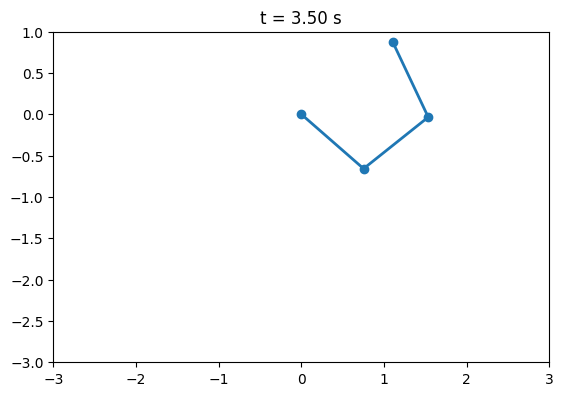

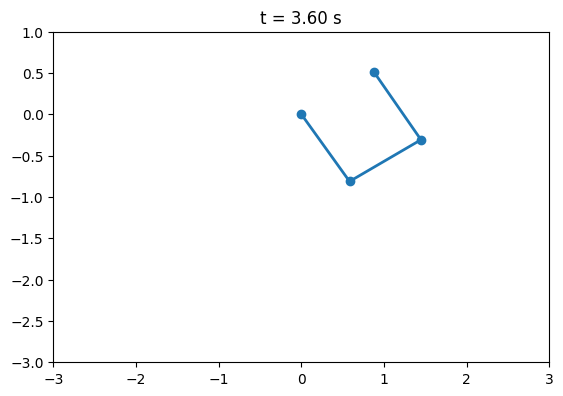

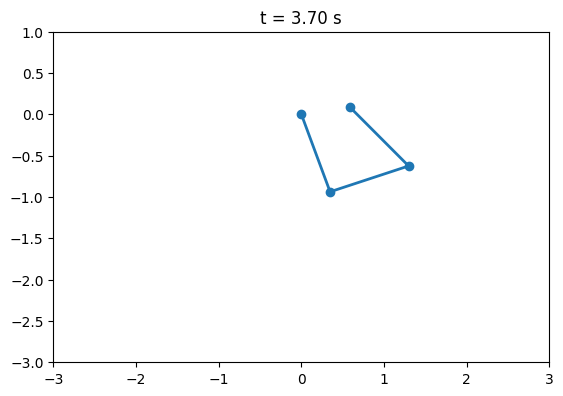

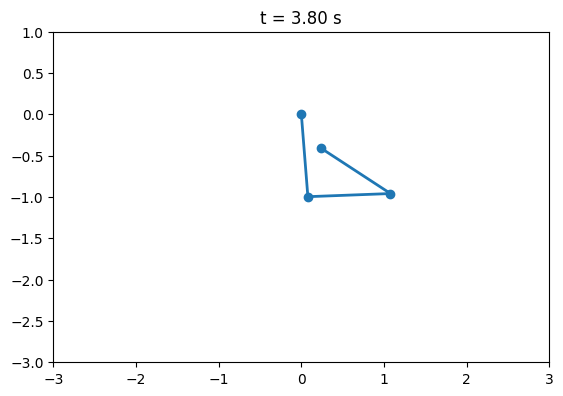

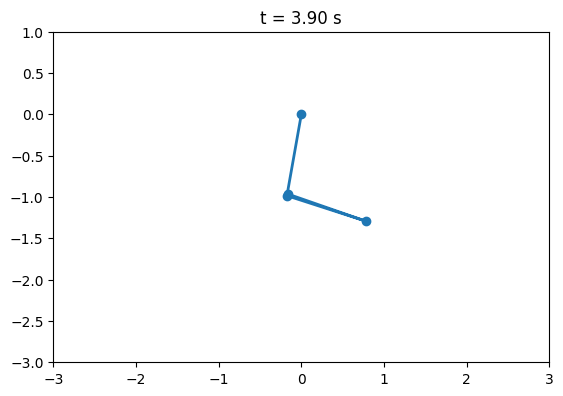

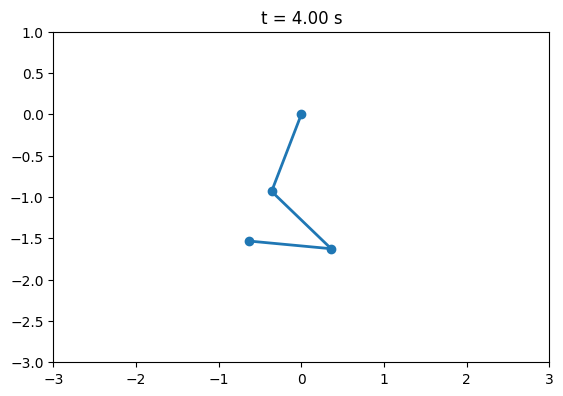

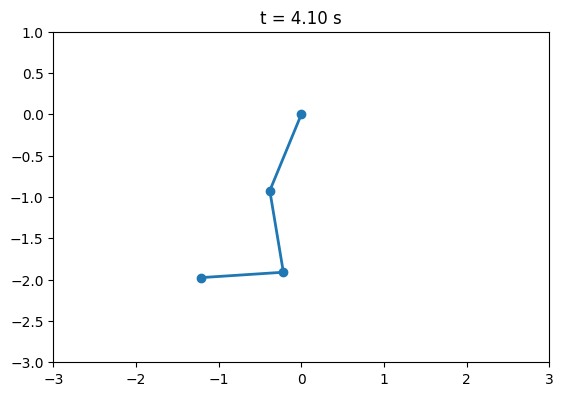

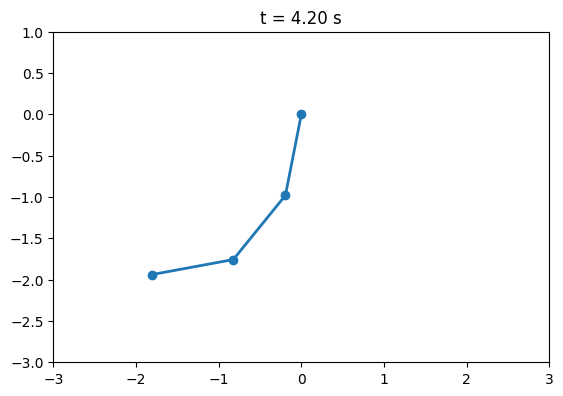

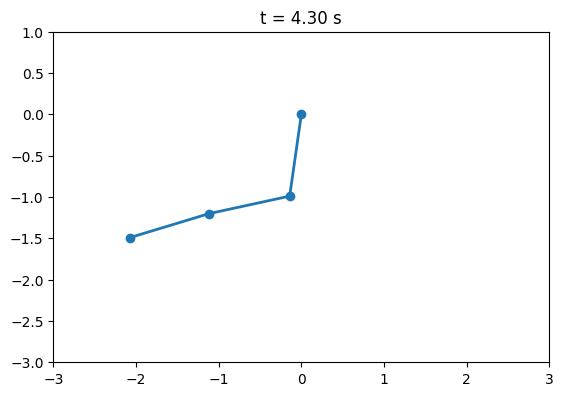

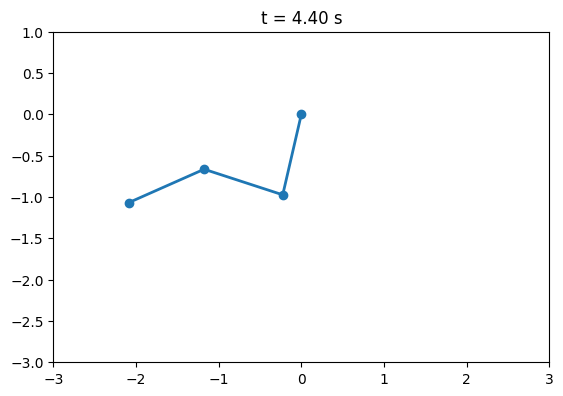

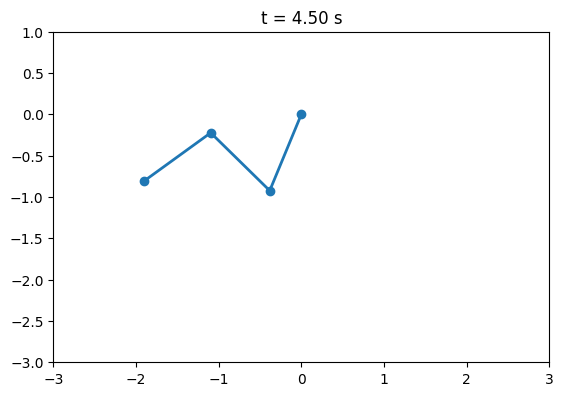

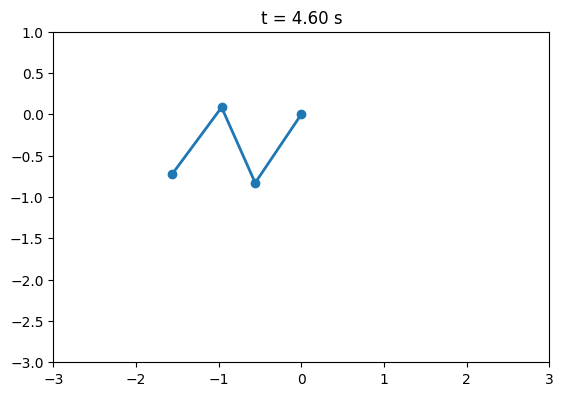

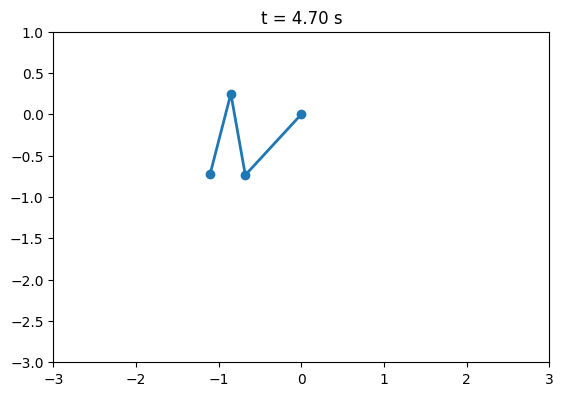

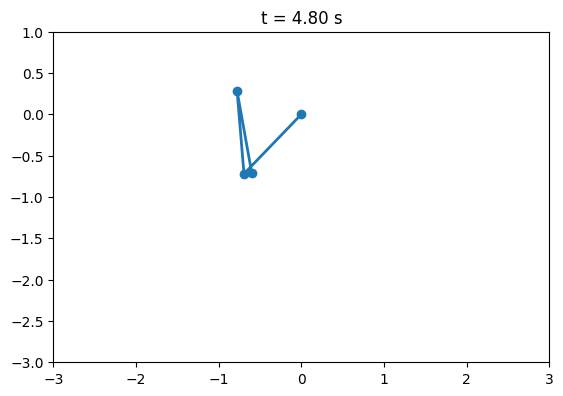

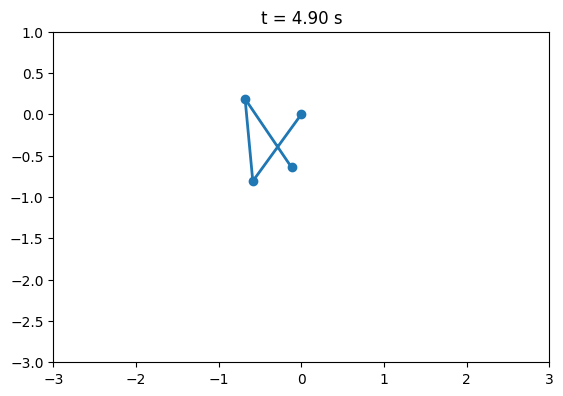

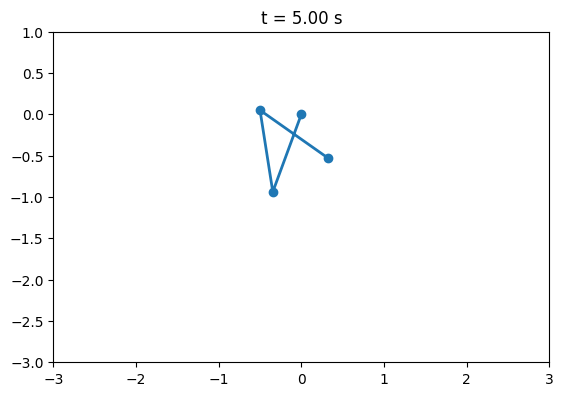

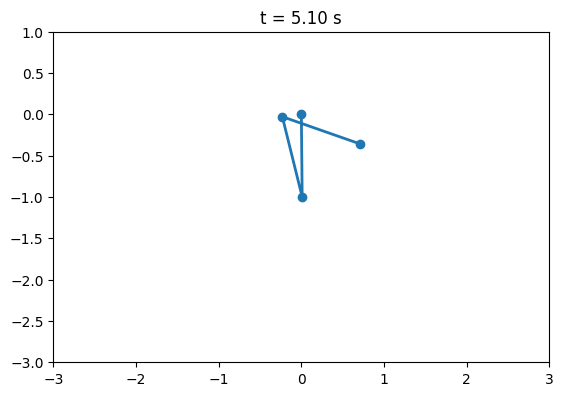

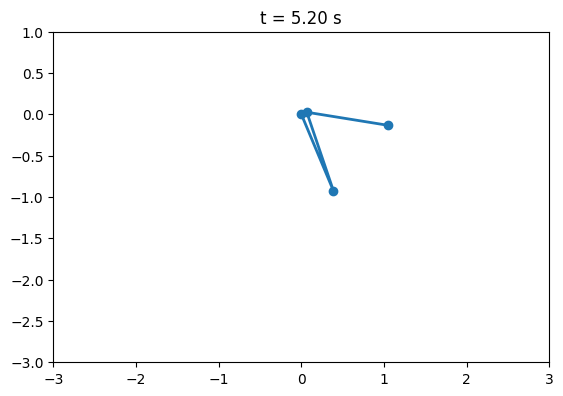

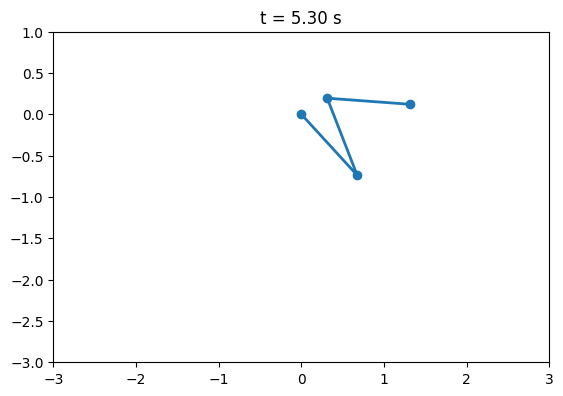

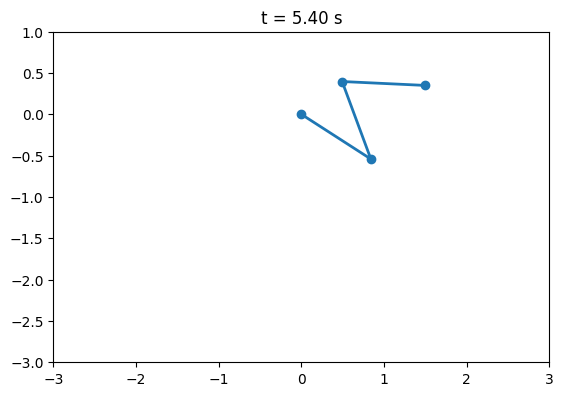

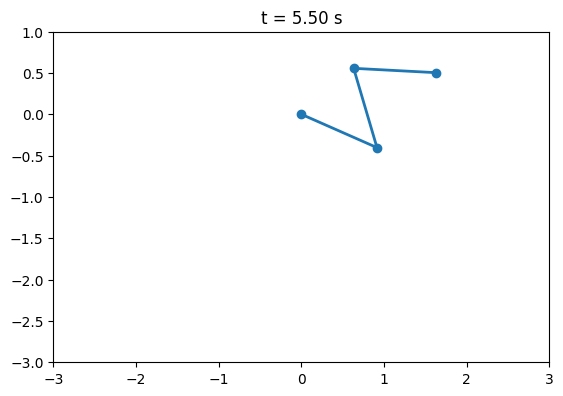

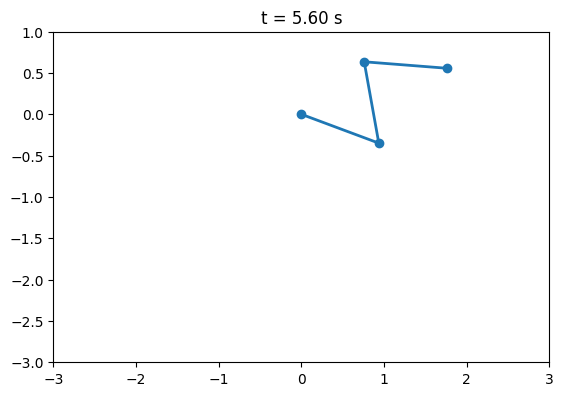

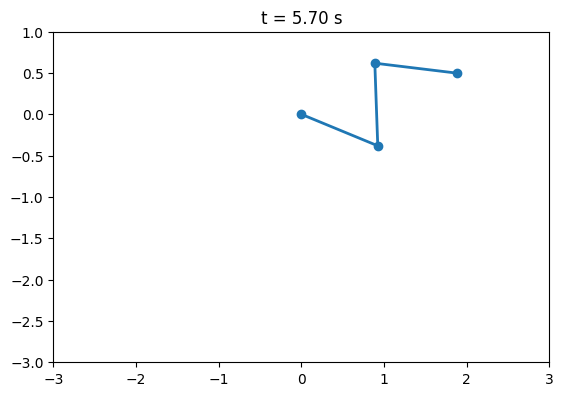

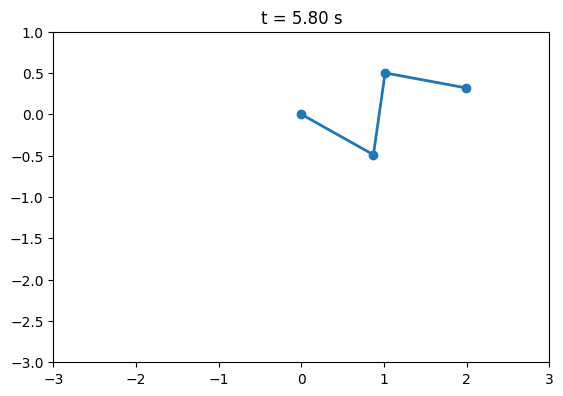

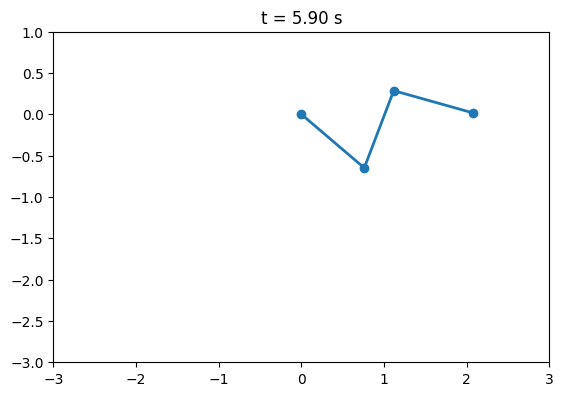

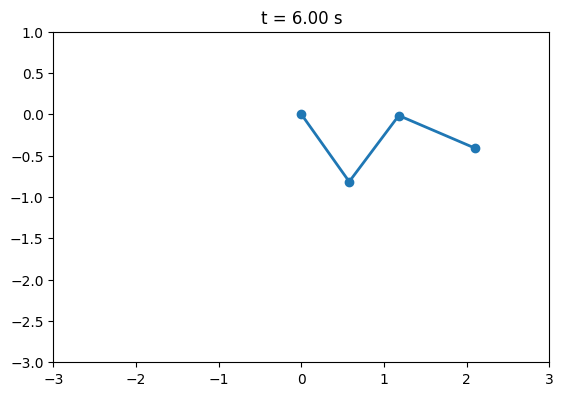

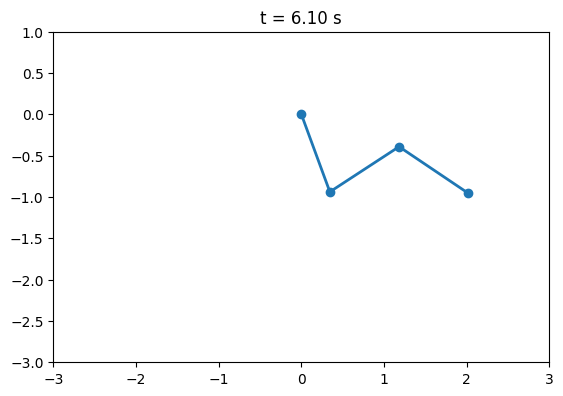

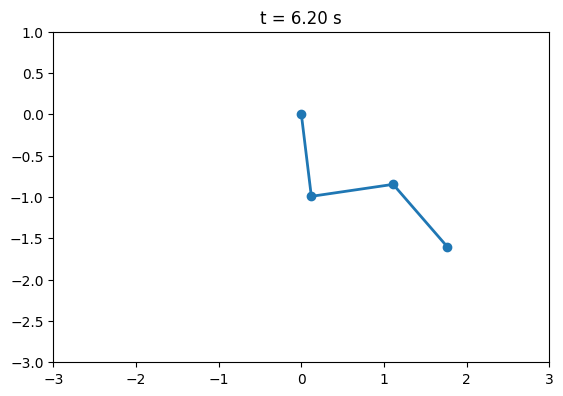

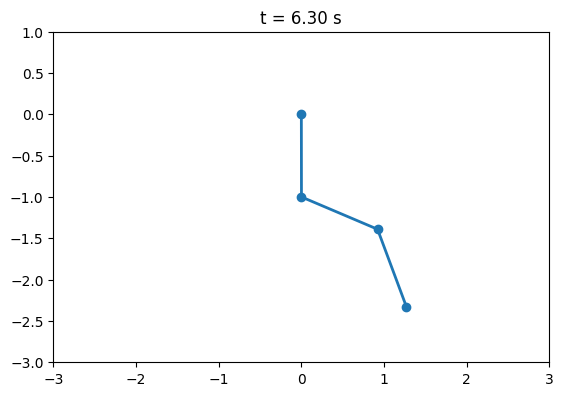

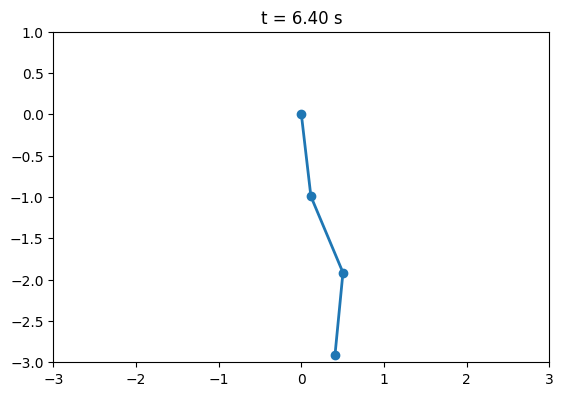

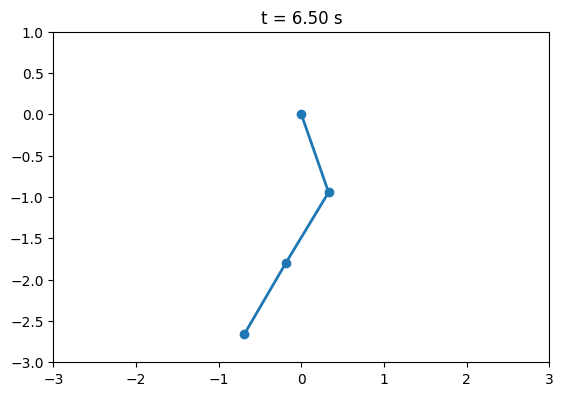

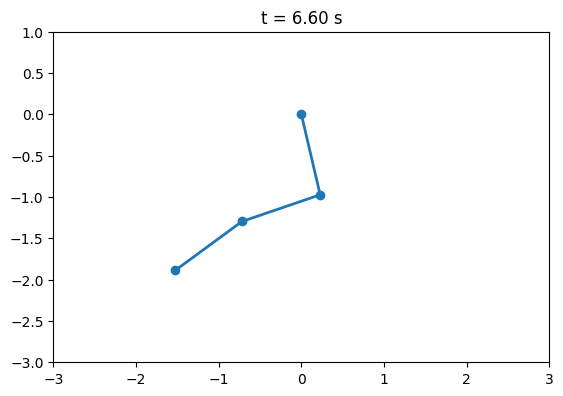

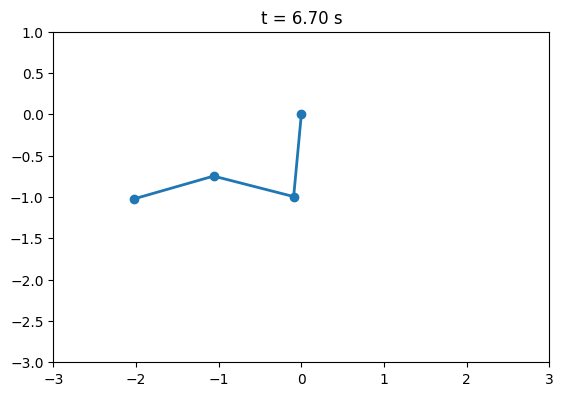

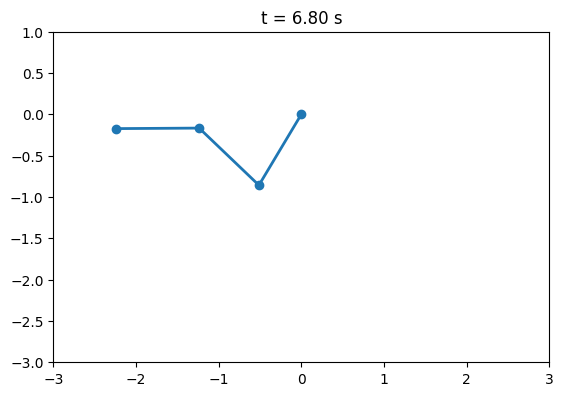

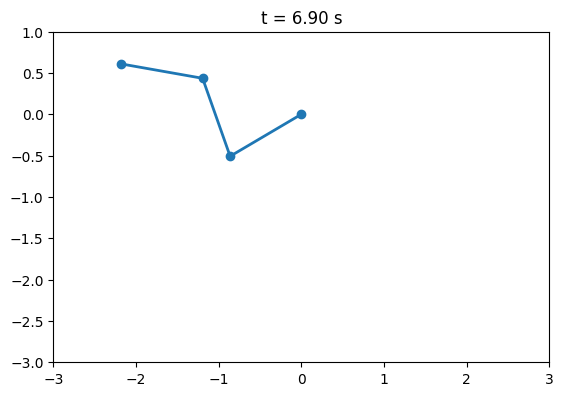

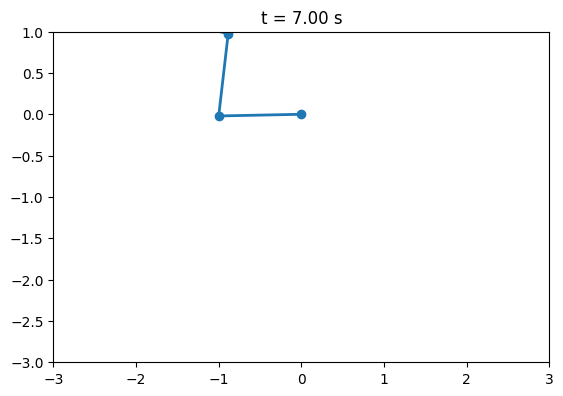

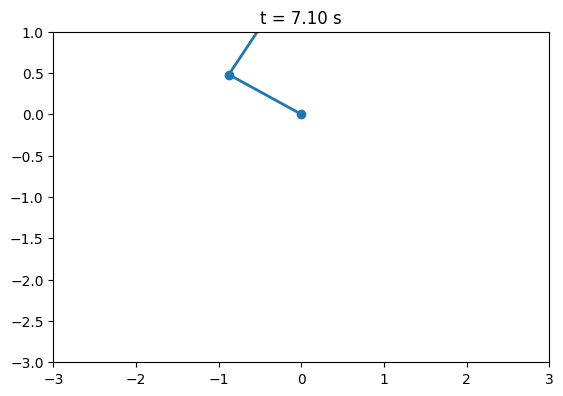

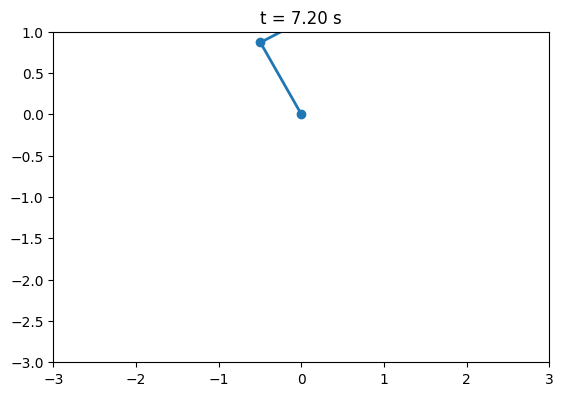

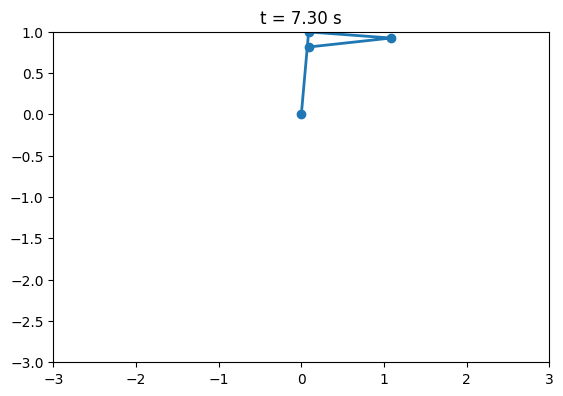

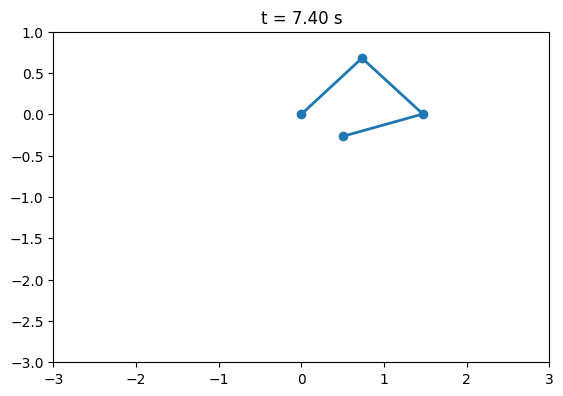

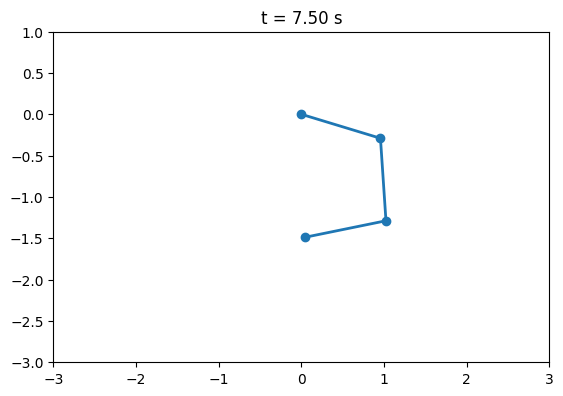

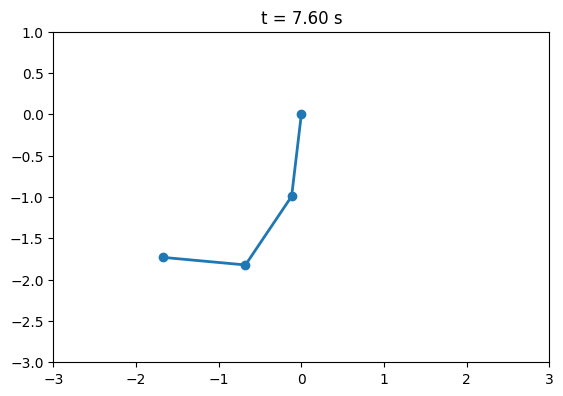

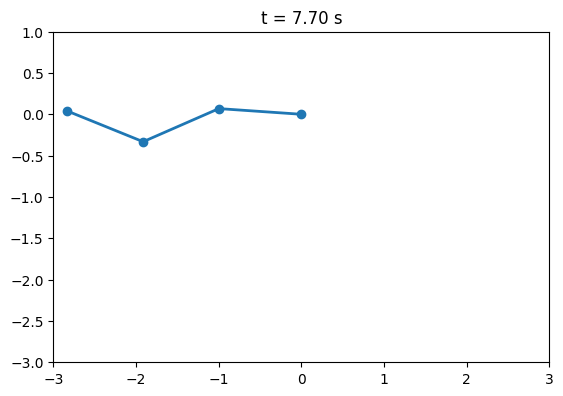

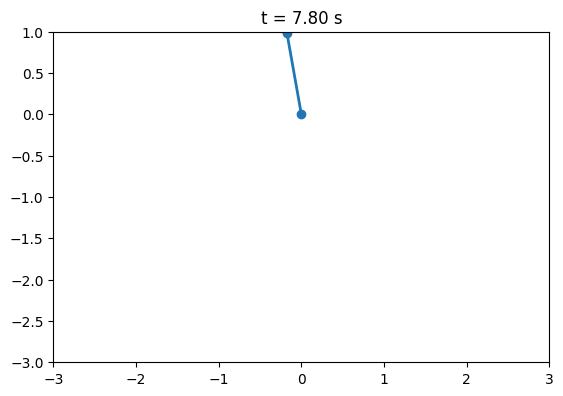

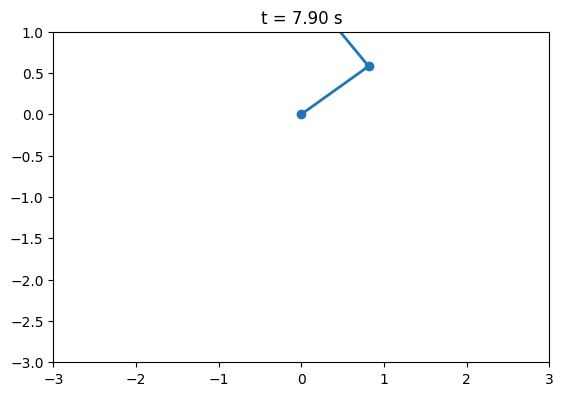

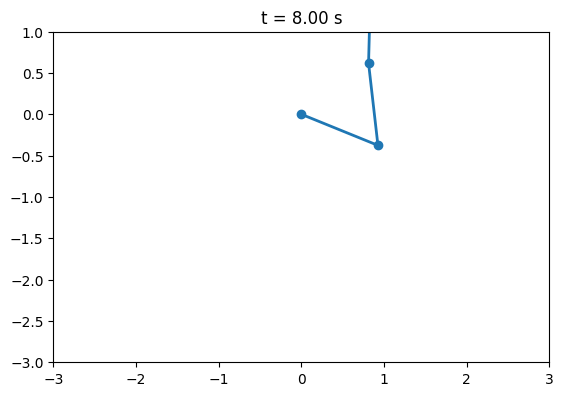

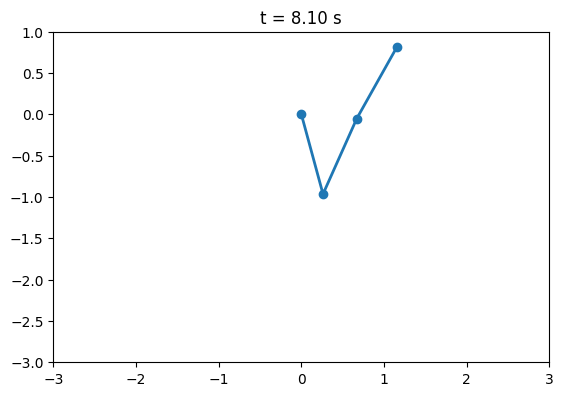

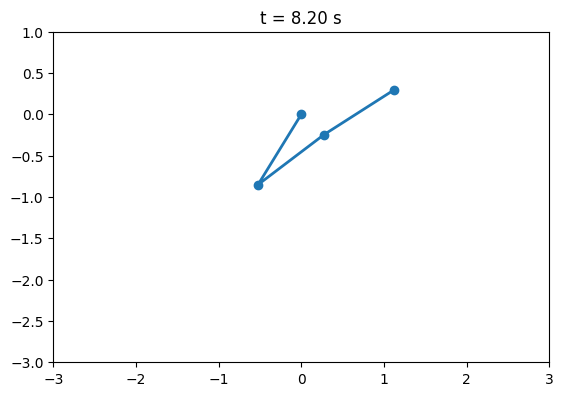

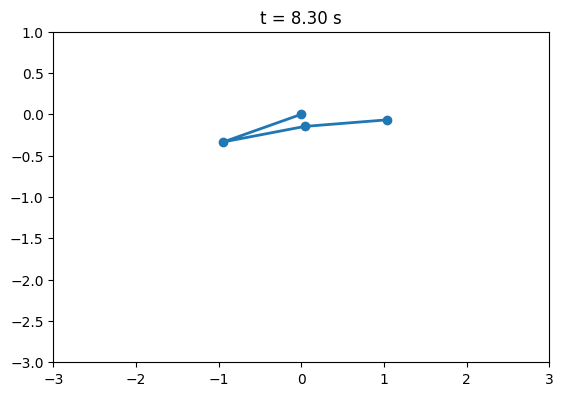

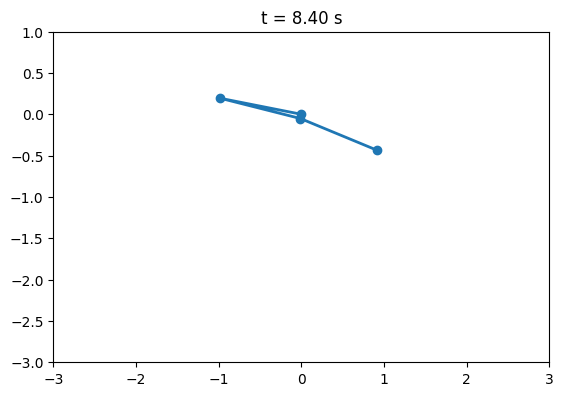

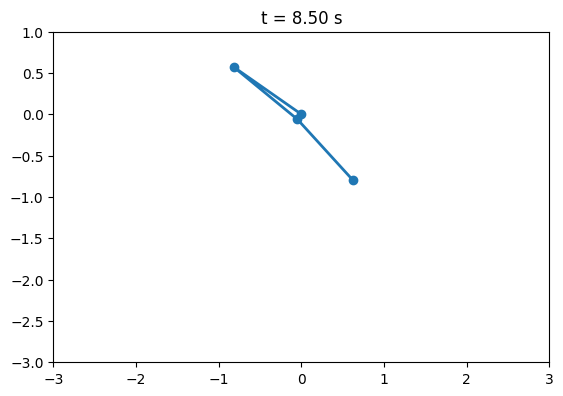

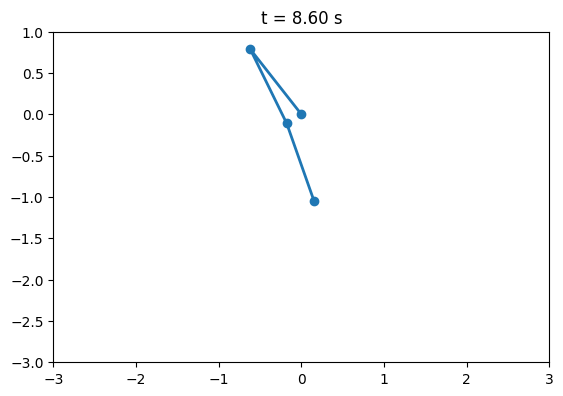

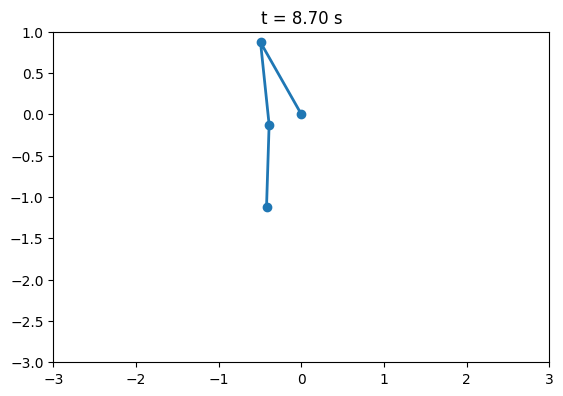

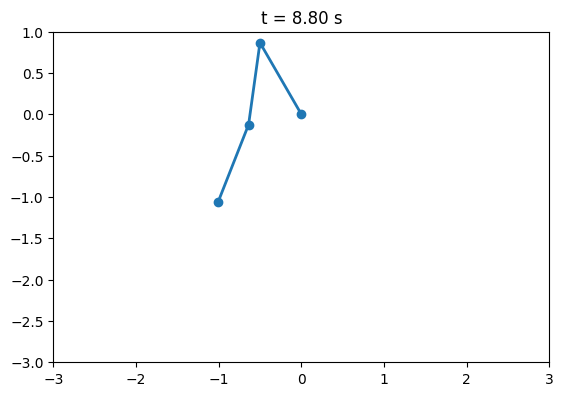

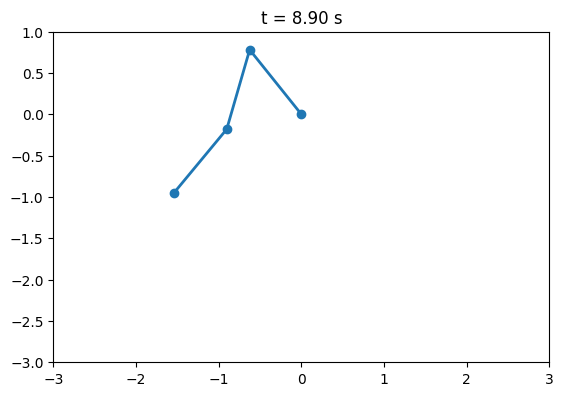

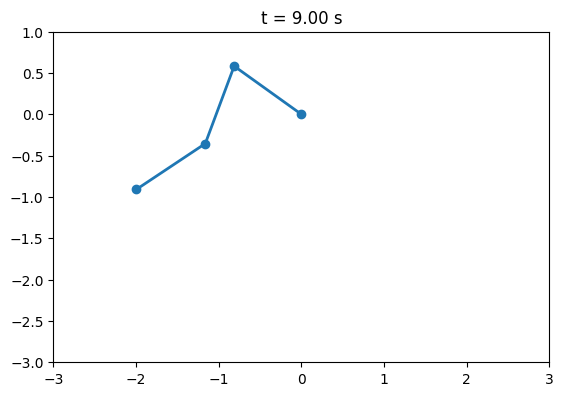

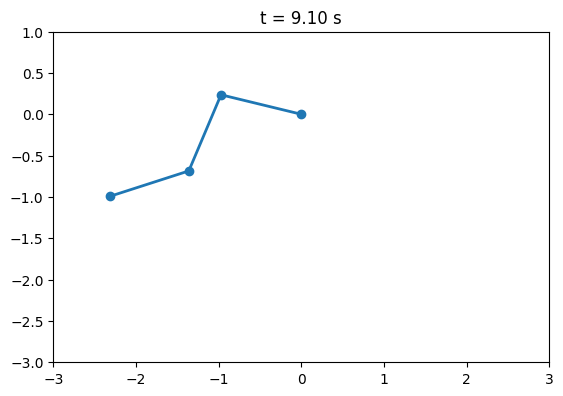

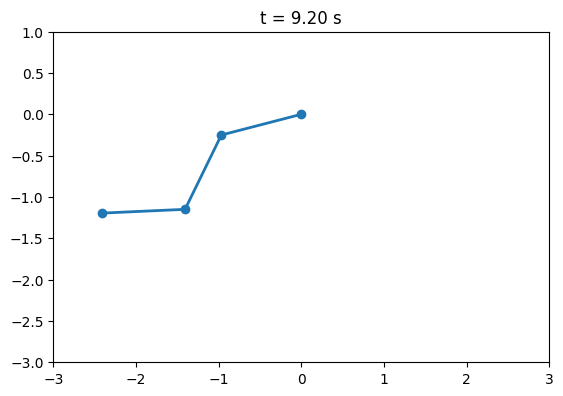

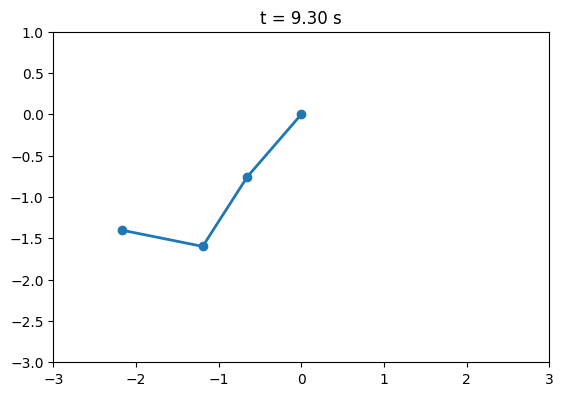

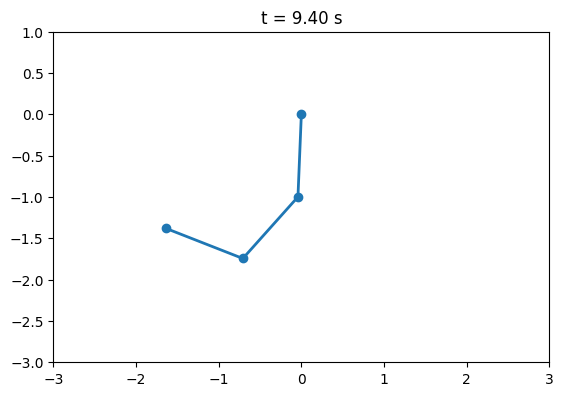

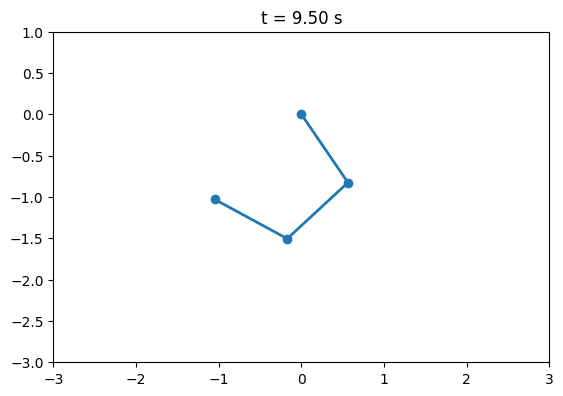

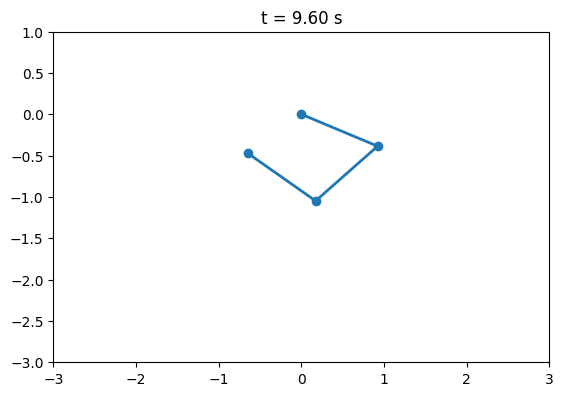

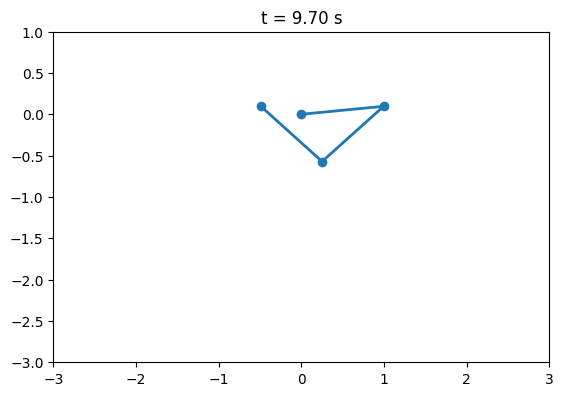

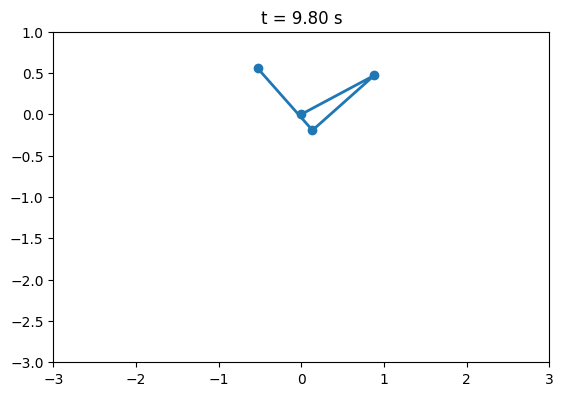

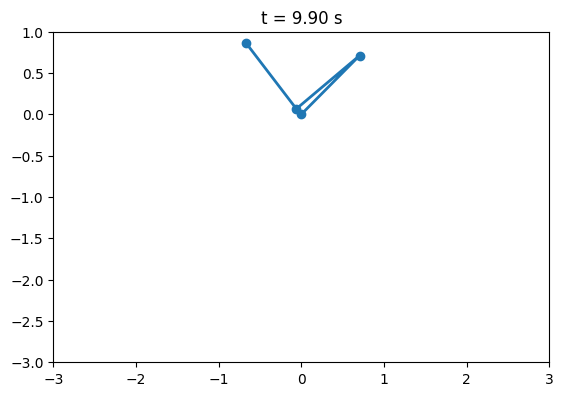

In [7]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def simulate_n_link_pendulum(n=3, lengths=None, masses=None, t_max=10, dt=0.01):
    if lengths is None:
        lengths = [1.0] * n
    if masses is None:
        masses = [1.0] * n

    y0 = np.zeros(2 * n)
    y0[:n] = np.pi / 2 * np.ones(n)  # initial angles
    y0[n:] = np.zeros(n)  # initial angular velocities

    t_eval = np.arange(0, t_max, dt)
    sol = solve_ivp(
        n_link_pendulum,
        t_span=(0, t_max),
        y0=y0,
        args=(n, lengths, masses),
        t_eval=t_eval,
        rtol=1e-8,
        atol=1e-10,
    )
    return sol


def plot_pendulum(sol, n, lengths):
    for i in range(0, len(sol.t), 10):
        θ = sol.y[:n, i]
        x = np.cumsum([l * np.sin(a) for l, a in zip(lengths, θ)])
        y = -np.cumsum([l * np.cos(a) for l, a in zip(lengths, θ)])

        plt.clf()
        plt.plot([0] + x.tolist(), [0] + y.tolist(), "o-", lw=2)
        plt.xlim(-n, n)
        plt.ylim(-n, 1)
        plt.gca().set_aspect("equal")
        plt.title(f"t = {sol.t[i]:.2f} s")
        plt.pause(0.01)
    plt.show()


# Example usage
n = 3
sol = simulate_n_link_pendulum(n=n)
plot_pendulum(sol, n=n, lengths=[1.0] * n)